In [9]:
library(data.table)
library(readr)
library(dplyr)
library(ggplot2)
library(GGally)
library(wbstats)
library(tidyr)

In [3]:
str(wb_cachelist, max.level = 1)

List of 7
 $ countries  :'data.frame':	304 obs. of  18 variables:
 $ indicators :'data.frame':	16978 obs. of  7 variables:
 $ sources    :'data.frame':	43 obs. of  8 variables:
 $ datacatalog:'data.frame':	238 obs. of  29 variables:
 $ topics     :'data.frame':	21 obs. of  3 variables:
 $ income     :'data.frame':	7 obs. of  3 variables:
 $ lending    :'data.frame':	4 obs. of  3 variables:


In [4]:
wb_data <- wb(indicator = c("SP.POP.TOTL", "NY.GDP.MKTP.CD", 
                            "NY.ADJ.NNTY.PC.CD", "SI.POV.NAPR.ZS", 
                           "SI.POV.GINI", "EN.CLC.MDAT.ZS", 
                            "EN.CLC.DRSK.XQ", "DT.ODA.DACD.EMRC.DISA.CD",
                           "VC.IDP.TOCV", "MO.INDEX.HDEV.XQ", 
                           "UNDP.HDI.XD", "SI.POV.NGAP", 
                            "DT.ODA.DACD.RFGE.CD",
                           "DT.ODA.DACD.EMRC.CD", "VC.BTL.DETH",
                           "SM.POP.REFG.OR"))

head(wb_data)

iso3c,date,value,indicatorID,indicator,iso2c,country
ARB,2017,414491886,SP.POP.TOTL,"Population, total",1A,Arab World
ARB,2016,406452690,SP.POP.TOTL,"Population, total",1A,Arab World
ARB,2015,398304960,SP.POP.TOTL,"Population, total",1A,Arab World
ARB,2014,390043028,SP.POP.TOTL,"Population, total",1A,Arab World
ARB,2013,381702086,SP.POP.TOTL,"Population, total",1A,Arab World
ARB,2012,373306993,SP.POP.TOTL,"Population, total",1A,Arab World


In [5]:
dim(wb_data)

[1] 60350     7

In [6]:
table(wb_data$indicatorID, wb_data$date)

                          
                           1960 1961 1962 1963 1964 1965 1966 1967 1968 1969
  DT.ODA.DACD.EMRC.CD         0    0    0    0    0    0    0    0    0    0
  DT.ODA.DACD.EMRC.DISA.CD    0    0    0    0    0    0    0    0    0    0
  DT.ODA.DACD.RFGE.CD         0    0    0    0    0    0    0    0    0    0
  EN.CLC.DRSK.XQ              0    0    0    0    0    0    0    0    0    0
  EN.CLC.MDAT.ZS              0    0    0    0    0    0    0    0    0    0
  MO.INDEX.HDEV.XQ            0    0    0    0    0    0    0    0    0    0
  NY.ADJ.NNTY.PC.CD           0    0    0    0    0    0    0    0    0    0
  NY.GDP.MKTP.CD            133  133  135  135  135  145  146  149  153  153
  SI.POV.GINI                 0    0    0    0    0    0    0    0    0    0
  SI.POV.NAPR.ZS              0    0    0    0    0    0    0    0    0    0
  SI.POV.NGAP                 0    0    0    0    0    0    0    0    0    0
  SM.POP.REFG.OR              0    0    0    0   

In [7]:
wb_data = wb_data %>% select(-indicator) 
head(wb_data)

iso3c,date,value,indicatorID,iso2c,country
ARB,2017,414491886,SP.POP.TOTL,1A,Arab World
ARB,2016,406452690,SP.POP.TOTL,1A,Arab World
ARB,2015,398304960,SP.POP.TOTL,1A,Arab World
ARB,2014,390043028,SP.POP.TOTL,1A,Arab World
ARB,2013,381702086,SP.POP.TOTL,1A,Arab World
ARB,2012,373306993,SP.POP.TOTL,1A,Arab World


In [11]:
wb_data_clean = wb_data %>% spread(key = indicatorID, value = value)
head(wb_data_clean)

iso3c,date,iso2c,country,DT.ODA.DACD.EMRC.CD,DT.ODA.DACD.EMRC.DISA.CD,DT.ODA.DACD.RFGE.CD,EN.CLC.DRSK.XQ,EN.CLC.MDAT.ZS,MO.INDEX.HDEV.XQ,NY.ADJ.NNTY.PC.CD,NY.GDP.MKTP.CD,SI.POV.GINI,SI.POV.NAPR.ZS,SI.POV.NGAP,SM.POP.REFG.OR,SP.POP.TOTL,UNDP.HDI.XD,VC.BTL.DETH,VC.IDP.TOCV
ARB,2017,1A,Arab World,NA,NA,NA,NA,NA,NA,NA,2.591047e+12,NA,NA,NA,8566301,414491886,NA,40515,NA
ARB,2016,1A,Arab World,NA,NA,NA,NA,NA,NA,5182.501,2.500164e+12,NA,NA,NA,7703491,406452690,NA,61540,16331500
ARB,2015,1A,Arab World,NA,NA,NA,NA,NA,NA,5443.484,2.554480e+12,NA,NA,NA,7077207,398304960,NA,67212,NA
ARB,2014,1A,Arab World,NA,NA,NA,NA,NA,NA,6043.694,2.906918e+12,NA,NA,NA,6200005,390043028,NA,74047,NA
ARB,2013,1A,Arab World,NA,NA,NA,NA,NA,NA,5920.748,2.866038e+12,NA,NA,NA,4804384,381702086,NA,NA,NA
ARB,2012,1A,Arab World,NA,NA,NA,NA,NA,NA,5847.785,2.786139e+12,NA,NA,NA,3359110,373306993,NA,NA,NA


In [12]:
## EMDAT data
flood = fread("/winhome/awahyudi/hackathon/EMDAT - Flood.csv", fill=TRUE)
storm = fread("/winhome/awahyudi/hackathon/EMDAT - Storm.csv", fill=TRUE)
earthquake = fread("/winhome/awahyudi/hackathon/EMDAT - Earthquake.csv", fill=TRUE)

In [13]:
dim(flood)
dim(storm)
dim(earthquake)

[1] 3139   19

[1] 2021   19

[1] 551  19

In [14]:
head(flood)

Start date,End date,Country,ISO,Location,Latitude,Longitude,Magnitude value,Magnitude scale,Disaster type,Disaster subtype,Associated disaster,Associated disaster2,Total deaths,Total affected,Total damage ('000 US$),Insured losses ('000 US$),Disaster name,Disaster No.
/02/1999,/02/1999,Afghanistan,AFG,Kanhahar & Helmand Provinces,NA,NA,NA,Km2,Flood,--,--,--,0,500,0,0,,1999-0575
22/03/2002,22/03/2002,Afghanistan,AFG,"Yulmarab village (Mazar-e-Sharif district, Balkh province)",NA,NA,NA,Km2,Flood,--,--,--,0,120,0,0,,2002-0185
04/04/2002,04/07/2002,Afghanistan,AFG,"Deh Miran area (Garziwan district, Faryab province)",NA,NA,1170,Km2,Flood,Riverine flood,--,--,39,4225,0,0,,2002-0196
23/04/2002,26/04/2002,Afghanistan,AFG,"Qala-e-Naw, Abkamari districts (Badghis province)",NA,NA,3650,Km2,Flood,Riverine flood,--,--,7,1200,0,0,,2002-0242
28/08/2002,28/08/2002,Afghanistan,AFG,Khost province,NA,NA,NA,Km2,Flood,--,--,--,35,0,0,0,,2002-0613
/01/2003,/01/2003,Afghanistan,AFG,"Kandahar, Hilmand, Nimroz, Zabul, Uruzgan, Daykundi provinces",NA,NA,0,Km2,Flood,Flash flood,--,--,10,0,0,0,,2003-0104


In [15]:
disaster = rbind(flood, storm, earthquake)
head(disaster)

Start date,End date,Country,ISO,Location,Latitude,Longitude,Magnitude value,Magnitude scale,Disaster type,Disaster subtype,Associated disaster,Associated disaster2,Total deaths,Total affected,Total damage ('000 US$),Insured losses ('000 US$),Disaster name,Disaster No.
/02/1999,/02/1999,Afghanistan,AFG,Kanhahar & Helmand Provinces,NA,NA,NA,Km2,Flood,--,--,--,0,500,0,0,,1999-0575
22/03/2002,22/03/2002,Afghanistan,AFG,"Yulmarab village (Mazar-e-Sharif district, Balkh province)",NA,NA,NA,Km2,Flood,--,--,--,0,120,0,0,,2002-0185
04/04/2002,04/07/2002,Afghanistan,AFG,"Deh Miran area (Garziwan district, Faryab province)",NA,NA,1170,Km2,Flood,Riverine flood,--,--,39,4225,0,0,,2002-0196
23/04/2002,26/04/2002,Afghanistan,AFG,"Qala-e-Naw, Abkamari districts (Badghis province)",NA,NA,3650,Km2,Flood,Riverine flood,--,--,7,1200,0,0,,2002-0242
28/08/2002,28/08/2002,Afghanistan,AFG,Khost province,NA,NA,NA,Km2,Flood,--,--,--,35,0,0,0,,2002-0613
/01/2003,/01/2003,Afghanistan,AFG,"Kandahar, Hilmand, Nimroz, Zabul, Uruzgan, Daykundi provinces",NA,NA,0,Km2,Flood,Flash flood,--,--,10,0,0,0,,2003-0104


In [16]:
dim(flood)
dim(storm)
dim(earthquake)
dim(disaster)

[1] 3139   19

[1] 2021   19

[1] 551  19

[1] 5711   19

In [17]:
head(disaster)

Start date,End date,Country,ISO,Location,Latitude,Longitude,Magnitude value,Magnitude scale,Disaster type,Disaster subtype,Associated disaster,Associated disaster2,Total deaths,Total affected,Total damage ('000 US$),Insured losses ('000 US$),Disaster name,Disaster No.
/02/1999,/02/1999,Afghanistan,AFG,Kanhahar & Helmand Provinces,NA,NA,NA,Km2,Flood,--,--,--,0,500,0,0,,1999-0575
22/03/2002,22/03/2002,Afghanistan,AFG,"Yulmarab village (Mazar-e-Sharif district, Balkh province)",NA,NA,NA,Km2,Flood,--,--,--,0,120,0,0,,2002-0185
04/04/2002,04/07/2002,Afghanistan,AFG,"Deh Miran area (Garziwan district, Faryab province)",NA,NA,1170,Km2,Flood,Riverine flood,--,--,39,4225,0,0,,2002-0196
23/04/2002,26/04/2002,Afghanistan,AFG,"Qala-e-Naw, Abkamari districts (Badghis province)",NA,NA,3650,Km2,Flood,Riverine flood,--,--,7,1200,0,0,,2002-0242
28/08/2002,28/08/2002,Afghanistan,AFG,Khost province,NA,NA,NA,Km2,Flood,--,--,--,35,0,0,0,,2002-0613
/01/2003,/01/2003,Afghanistan,AFG,"Kandahar, Hilmand, Nimroz, Zabul, Uruzgan, Daykundi provinces",NA,NA,0,Km2,Flood,Flash flood,--,--,10,0,0,0,,2003-0104


In [18]:
disaster_modif = disaster %>% 
    separate("Start date", c("Start.Day", "Start.Month", "Start.Year"), 
             sep="/") %>%
    separate("End date", c("End.Day", "End.Month", "End.Year"), 
             sep="/") 

In [19]:
head(disaster_modif)

Start.Day,Start.Month,Start.Year,End.Day,End.Month,End.Year,Country,ISO,Location,Latitude,⋯,Disaster type,Disaster subtype,Associated disaster,Associated disaster2,Total deaths,Total affected,Total damage ('000 US$),Insured losses ('000 US$),Disaster name,Disaster No.
,02,1999,,02,1999,Afghanistan,AFG,Kanhahar & Helmand Provinces,NA,⋯,Flood,--,--,--,0,500,0,0,,1999-0575
22,03,2002,22,03,2002,Afghanistan,AFG,"Yulmarab village (Mazar-e-Sharif district, Balkh province)",NA,⋯,Flood,--,--,--,0,120,0,0,,2002-0185
04,04,2002,04,07,2002,Afghanistan,AFG,"Deh Miran area (Garziwan district, Faryab province)",NA,⋯,Flood,Riverine flood,--,--,39,4225,0,0,,2002-0196
23,04,2002,26,04,2002,Afghanistan,AFG,"Qala-e-Naw, Abkamari districts (Badghis province)",NA,⋯,Flood,Riverine flood,--,--,7,1200,0,0,,2002-0242
28,08,2002,28,08,2002,Afghanistan,AFG,Khost province,NA,⋯,Flood,--,--,--,35,0,0,0,,2002-0613
,01,2003,,01,2003,Afghanistan,AFG,"Kandahar, Hilmand, Nimroz, Zabul, Uruzgan, Daykundi provinces",NA,⋯,Flood,Flash flood,--,--,10,0,0,0,,2003-0104


In [21]:
dim(disaster_modif)

[1] 5711   23

In [22]:
head(wb_data_clean)

iso3c,date,iso2c,country,DT.ODA.DACD.EMRC.CD,DT.ODA.DACD.EMRC.DISA.CD,DT.ODA.DACD.RFGE.CD,EN.CLC.DRSK.XQ,EN.CLC.MDAT.ZS,MO.INDEX.HDEV.XQ,NY.ADJ.NNTY.PC.CD,NY.GDP.MKTP.CD,SI.POV.GINI,SI.POV.NAPR.ZS,SI.POV.NGAP,SM.POP.REFG.OR,SP.POP.TOTL,UNDP.HDI.XD,VC.BTL.DETH,VC.IDP.TOCV
ARB,2017,1A,Arab World,NA,NA,NA,NA,NA,NA,NA,2.591047e+12,NA,NA,NA,8566301,414491886,NA,40515,NA
ARB,2016,1A,Arab World,NA,NA,NA,NA,NA,NA,5182.501,2.500164e+12,NA,NA,NA,7703491,406452690,NA,61540,16331500
ARB,2015,1A,Arab World,NA,NA,NA,NA,NA,NA,5443.484,2.554480e+12,NA,NA,NA,7077207,398304960,NA,67212,NA
ARB,2014,1A,Arab World,NA,NA,NA,NA,NA,NA,6043.694,2.906918e+12,NA,NA,NA,6200005,390043028,NA,74047,NA
ARB,2013,1A,Arab World,NA,NA,NA,NA,NA,NA,5920.748,2.866038e+12,NA,NA,NA,4804384,381702086,NA,NA,NA
ARB,2012,1A,Arab World,NA,NA,NA,NA,NA,NA,5847.785,2.786139e+12,NA,NA,NA,3359110,373306993,NA,NA,NA


In [23]:
dim(wb_data_clean)

[1] 21903    20

In [24]:
combine_data1 = disaster_modif %>% left_join(wb_data_clean, by = 
                          c("ISO" = "iso3c", "Start.Year" = "date"))

In [25]:
dim(combine_data1)

[1] 5716   41

In [26]:
head(combine_data1)

Start.Day,Start.Month,Start.Year,End.Day,End.Month,End.Year,Country,ISO,Location,Latitude,⋯,NY.ADJ.NNTY.PC.CD,NY.GDP.MKTP.CD,SI.POV.GINI,SI.POV.NAPR.ZS,SI.POV.NGAP,SM.POP.REFG.OR,SP.POP.TOTL,UNDP.HDI.XD,VC.BTL.DETH,VC.IDP.TOCV
,02,1999,,02,1999,Afghanistan,AFG,Kanhahar & Helmand Provinces,NA,⋯,NA,NA,NA,NA,NA,2601691,19403676,NA,4629,NA
22,03,2002,22,03,2002,Afghanistan,AFG,"Yulmarab village (Mazar-e-Sharif district, Balkh province)",NA,⋯,169.8866,4128820723,NA,NA,NA,2510294,21979923,NA,890,NA
04,04,2002,04,07,2002,Afghanistan,AFG,"Deh Miran area (Garziwan district, Faryab province)",NA,⋯,169.8866,4128820723,NA,NA,NA,2510294,21979923,NA,890,NA
23,04,2002,26,04,2002,Afghanistan,AFG,"Qala-e-Naw, Abkamari districts (Badghis province)",NA,⋯,169.8866,4128820723,NA,NA,NA,2510294,21979923,NA,890,NA
28,08,2002,28,08,2002,Afghanistan,AFG,Khost province,NA,⋯,169.8866,4128820723,NA,NA,NA,2510294,21979923,NA,890,NA
,01,2003,,01,2003,Afghanistan,AFG,"Kandahar, Hilmand, Nimroz, Zabul, Uruzgan, Daykundi provinces",NA,⋯,178.7278,4583644246,NA,NA,NA,2136043,23064851,NA,687,NA


In [27]:
fwrite(combine_data1, "disaster_wb_clean.csv")

In [28]:
names(combine_data1)

[1] "Start.Day"                 "Start.Month"              
 [3] "Start.Year"                "End.Day"                  
 [5] "End.Month"                 "End.Year"                 
 [7] "Country"                   "ISO"                      
 [9] "Location"                  "Latitude"                 
[11] "Longitude"                 "Magnitude value"          
[13] "Magnitude scale"           "Disaster type"            
[15] "Disaster subtype"          "Associated disaster"      
[17] "Associated disaster2"      "Total deaths"             
[19] "Total affected"            "Total damage ('000 US$)"  
[21] "Insured losses ('000 US$)" "Disaster name"            
[23] "Disaster No."              "iso2c"                    
[25] "country"                   "DT.ODA.DACD.EMRC.CD"      
[27] "DT.ODA.DACD.EMRC.DISA.CD"  "DT.ODA.DACD.RFGE.CD"      
[29] "EN.CLC.DRSK.XQ"            "EN.CLC.MDAT.ZS"           
[31] "MO.INDEX.HDEV.XQ"          "NY.ADJ.NNTY.PC.CD"        
[33] "NY.GDP.MKTP.CD"            "SI.POV.GINI"              
[35] "SI.POV.NAPR.ZS"            "SI.POV.NGAP"              
[37] "SM.POP.REFG.OR"            "SP.POP.TOTL"              
[39] "UNDP.HDI.XD"               "VC.BTL.DETH"              
[41] "VC.IDP.TOCV"

In [29]:
wbsearch(pattern = 'VC.IDP.TOCV', fields = "indicatorID")

,indicatorID,indicator
273,VC.IDP.TOCV,"Internally displaced persons, total displaced by conflict and violence (number of people)"


In [30]:
combine_data1$Start.Year = as.numeric(combine_data1$Start.Year)

In [31]:
head(combine_data1) %>% glimpse()

Observations: 6
Variables: 41
$ Start.Day                   <chr> "", "22", "04", "23", "28", ""
$ Start.Month                 <chr> "02", "03", "04", "04", "08", "01"
$ Start.Year                  <dbl> 1999, 2002, 2002, 2002, 2002, 2003
$ End.Day                     <chr> "", "22", "04", "26", "28", ""
$ End.Month                   <chr> "02", "03", "07", "04", "08", "01"
$ End.Year                    <chr> "1999", "2002", "2002", "2002", "2002",...
$ Country                     <chr> "Afghanistan", "Afghanistan", "Afghanis...
$ ISO                         <chr> "AFG", "AFG", "AFG", "AFG", "AFG", "AFG"
$ Location                    <chr> "Kanhahar & Helmand Provinces", "Yulmar...
$ Latitude                    <chr> NA, NA, NA, NA, NA, NA
$ Longitude                   <chr> NA, NA, NA, NA, NA, NA
$ `Magnitude value`           <dbl> NA, NA, 1170, 3650, NA, 0
$ `Magnitude scale`           <chr> "Km2", "Km2", "Km2", "Km2", "Km2", "Km2"
$ `Disaster type`             <chr> "Flood", "Flood"

Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 3087 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 5177 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 5408 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 5344 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 5566 rows containing missing values”Warning message in cor(x, y, method = method, use = use):
“the standard deviation is zero”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 5459 rows containing missing values”Warning message in cor(x, y, method = method, use = use):
“the standard deviation is zero”Warning message in (function

Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 5177 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 5408 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 5344 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 5566 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 5459 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 5095 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 723 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pe

“Removed 5660 rows containing missing values”Warning message:
“Removed 5408 rows containing missing values (geom_point).”Warning message:
“Removed 5596 rows containing missing values (geom_point).”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 5408 rows containing non-finite values (stat_bin).”Warning message:
“Removed 5408 rows containing missing values (geom_point).”Warning message:
“Removed 5408 rows containing missing values (geom_point).”Warning message:
“Removed 5408 rows containing missing values (geom_point).”Warning message:
“Removed 5408 rows containing missing values (geom_point).”Warning message:
“Removed 5408 rows containing missing values (geom_point).”Warning message:
“Removed 5408 rows containing non-finite values (stat_density).”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 5535 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, m

“Removed 5653 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 5462 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 5459 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 5659 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 5629 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 5623 rows containing missing values”Warning message:
“Removed 5095 rows containing missing values (geom_point).”Warning message:
“Removed 5453 rows containing missing values (geom_point).”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 5095 rows containing non-finite values (stat_bin).

“Removed 4145 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 4144 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 5639 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 5348 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 5503 rows containing missing values”Warning message:
“Removed 348 rows containing missing values (geom_point).”Warning message:
“Removed 3258 rows containing missing values (geom_point).”`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 348 rows containing non-finite values (stat_bin).”Warning message:
“Removed 348 rows containing missing values (geom_point).”Warning message:
“Removed 348 rows containing missing valu

“Removed 4799 rows containing missing values (geom_point).”Warning message:
“Removed 4799 rows containing missing values (geom_point).”Warning message:
“Removed 4799 rows containing missing values (geom_point).”Warning message:
“Removed 5660 rows containing missing values (geom_point).”Warning message:
“Removed 5660 rows containing missing values (geom_point).”Warning message:
“Removed 5687 rows containing missing values (geom_point).”Warning message:
“Removed 5659 rows containing missing values (geom_point).”Warning message:
“Removed 5623 rows containing missing values (geom_point).”Warning message:
“Removed 5664 rows containing missing values (geom_point).”Warning message:
“Removed 4935 rows containing missing values (geom_point).”Warning message:
“Removed 4808 rows containing missing values (geom_point).”Warning message:
“Removed 5503 rows containing missing values (geom_point).”Warning message:
“Removed 4799 rows containing missing values (geom_point).”Warning message:
“Removed 479

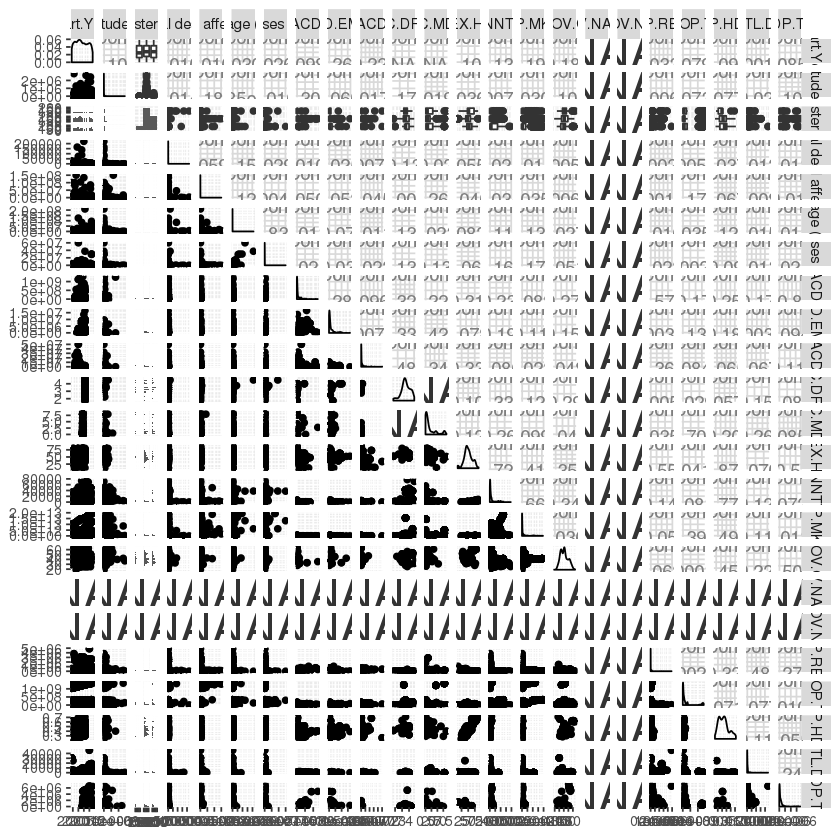

In [32]:
ggpairs(combine_data1, columns = c('Start.Year', 'Magnitude value', 'Disaster type', 'Total deaths', 
                                   'Total affected', 'Total damage (\'000 US$)',
                                   'Insured losses (\'000 US$)', 
                                   'DT.ODA.DACD.EMRC.CD', 'DT.ODA.DACD.EMRC.DISA.CD',
                                   'DT.ODA.DACD.RFGE.CD', 'EN.CLC.DRSK.XQ',
                                   'EN.CLC.MDAT.ZS', 'MO.INDEX.HDEV.XQ', 'NY.ADJ.NNTY.PC.CD',
                                   'NY.GDP.MKTP.CD', 'SI.POV.GINI', 'SI.POV.NAPR.ZS', 
                                   'SI.POV.NGAP', 'SM.POP.REFG.OR', 'SP.POP.TOTL', 
                                   'UNDP.HDI.XD', 'VC.BTL.DETH', 'VC.IDP.TOCV'))

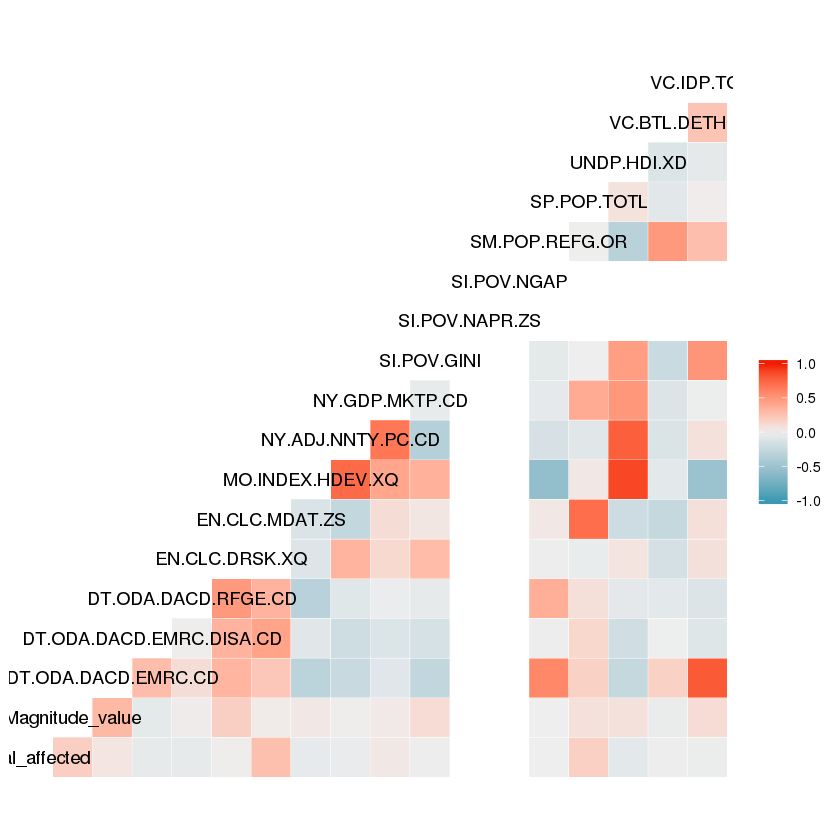

In [33]:
ggcorr(combine_data1[,c('Total affected', 'Magnitude value',
                                   'DT.ODA.DACD.EMRC.CD', 'DT.ODA.DACD.EMRC.DISA.CD',
                                   'DT.ODA.DACD.RFGE.CD', 'EN.CLC.DRSK.XQ',
                                   'EN.CLC.MDAT.ZS', 'MO.INDEX.HDEV.XQ', 'NY.ADJ.NNTY.PC.CD',
                                   'NY.GDP.MKTP.CD', 'SI.POV.GINI', 'SI.POV.NAPR.ZS', 
                                   'SI.POV.NGAP', 'SM.POP.REFG.OR', 'SP.POP.TOTL', 
                                   'UNDP.HDI.XD', 'VC.BTL.DETH', 'VC.IDP.TOCV')])    

In [40]:
summary(combine_data1)

  Start.Day         Start.Month          Start.Year     End.Day         
 Length:5716        Length:5716        Min.   :1999   Length:5716       
 Class :character   Class :character   1st Qu.:2003   Class :character  
 Mode  :character   Mode  :character   Median :2008   Mode  :character  
                                       Mean   :2008                     
                                       3rd Qu.:2013                     
                                       Max.   :2018                     
                                                                        
  End.Month           End.Year           Country              ISO           
 Length:5716        Length:5716        Length:5716        Length:5716       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                               

In [41]:
summary(combine_data_no_na)

  Start.Day         Start.Month          Start.Year     End.Day         
 Length:5716        Length:5716        Min.   :1999   Length:5716       
 Class :character   Class :character   1st Qu.:2003   Class :character  
 Mode  :character   Mode  :character   Median :2008   Mode  :character  
                                       Mean   :2008                     
                                       3rd Qu.:2013                     
                                       Max.   :2018                     
                                                                        
  End.Month           End.Year           Country              ISO           
 Length:5716        Length:5716        Length:5716        Length:5716       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                               

Warning message in cor(data, use = method[1], method = method[2]):
“the standard deviation is zero”

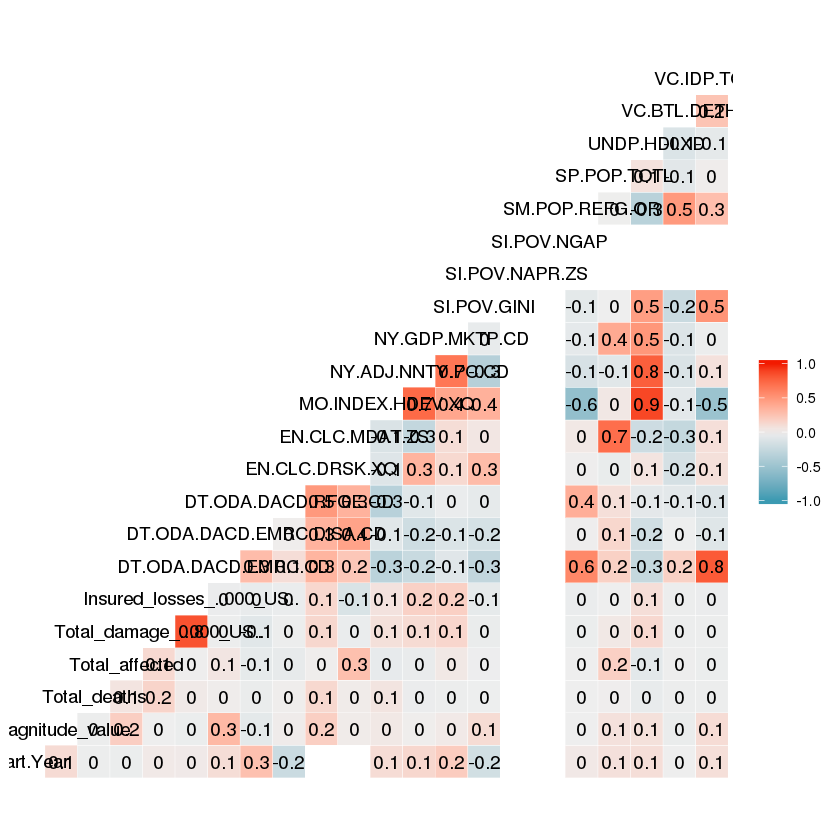

In [42]:
ggcorr(combine_data_no_na[,c('Start.Year', 'Magnitude value', 'Total deaths', 
                                   'Total affected', 'Total damage (\'000 US$)',
                                   'Insured losses (\'000 US$)', 
                                   'DT.ODA.DACD.EMRC.CD', 'DT.ODA.DACD.EMRC.DISA.CD',
                                   'DT.ODA.DACD.RFGE.CD', 'EN.CLC.DRSK.XQ',
                                   'EN.CLC.MDAT.ZS', 'MO.INDEX.HDEV.XQ', 'NY.ADJ.NNTY.PC.CD',
                                   'NY.GDP.MKTP.CD', 'SI.POV.GINI', 'SI.POV.NAPR.ZS', 
                                   'SI.POV.NGAP', 'SM.POP.REFG.OR', 'SP.POP.TOTL', 
                                   'UNDP.HDI.XD', 'VC.BTL.DETH', 'VC.IDP.TOCV')],
       palette = "Rdbu", label=TRUE)

Warning message:
“Removed 3087 rows containing non-finite values (stat_density).”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 3087 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 3087 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 3087 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 3087 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 3214 rows containing missing values”Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 5642 rows containing missing values”Warning message:
“Removed 3087 rows containing missing values (geom_point).”Warning message in min(yVal, na.rm = TRUE):
“no non

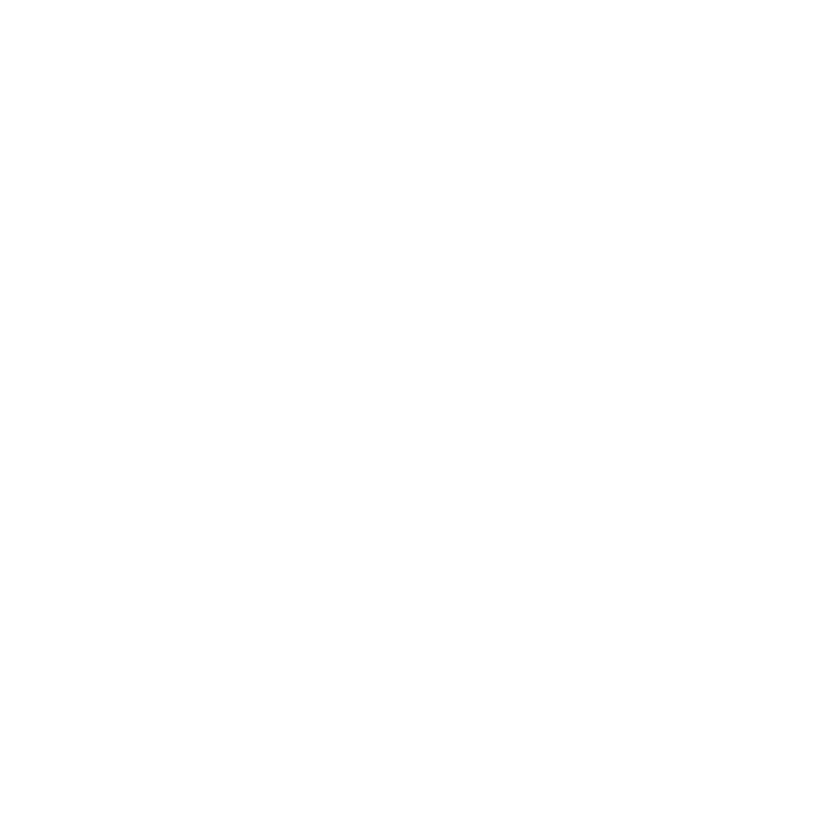

In [44]:
ggpairs(combine_data_no_na, columns = c('Magnitude value', 'Total affected', 
                                   'Total affected', 'Total damage (\'000 US$)',
                                   'Insured losses (\'000 US$)', 
                                   'SP.POP.TOTL', 'EN.CLC.DRSK.XQ'))

In [46]:
attach(combine_data_no_na)

Warning message:
“Removed 3087 rows containing missing values (geom_point).”

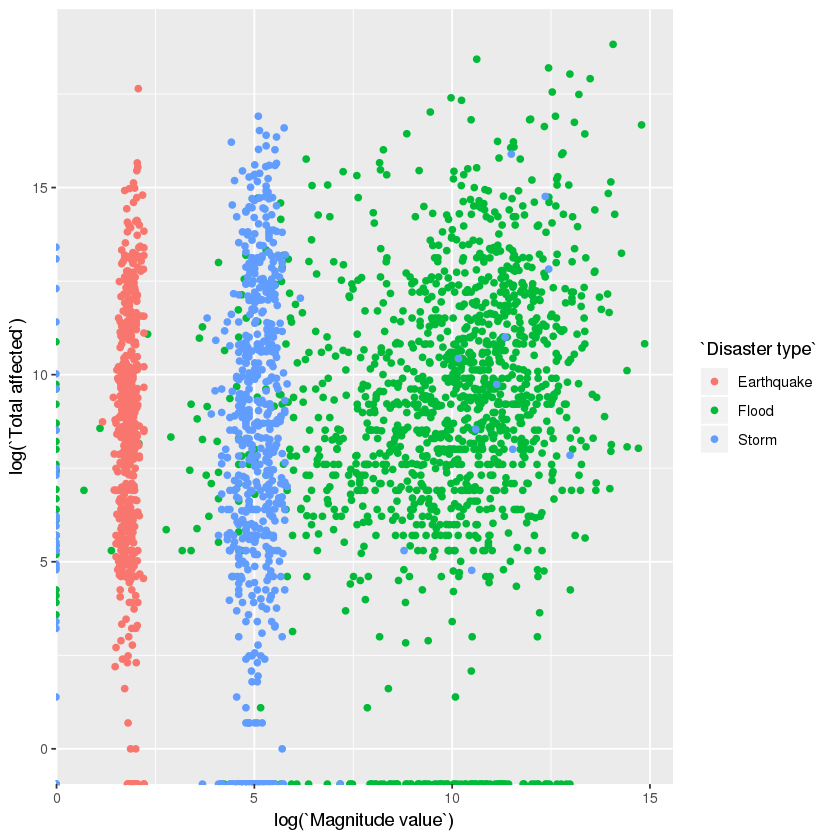

In [50]:
ggplot(combine_data_no_na, aes(log(`Magnitude value`), log(`Total affected`), 
       color = `Disaster type`)) + 
    geom_point()

Warning message:
“Removed 3087 rows containing missing values (geom_point).”

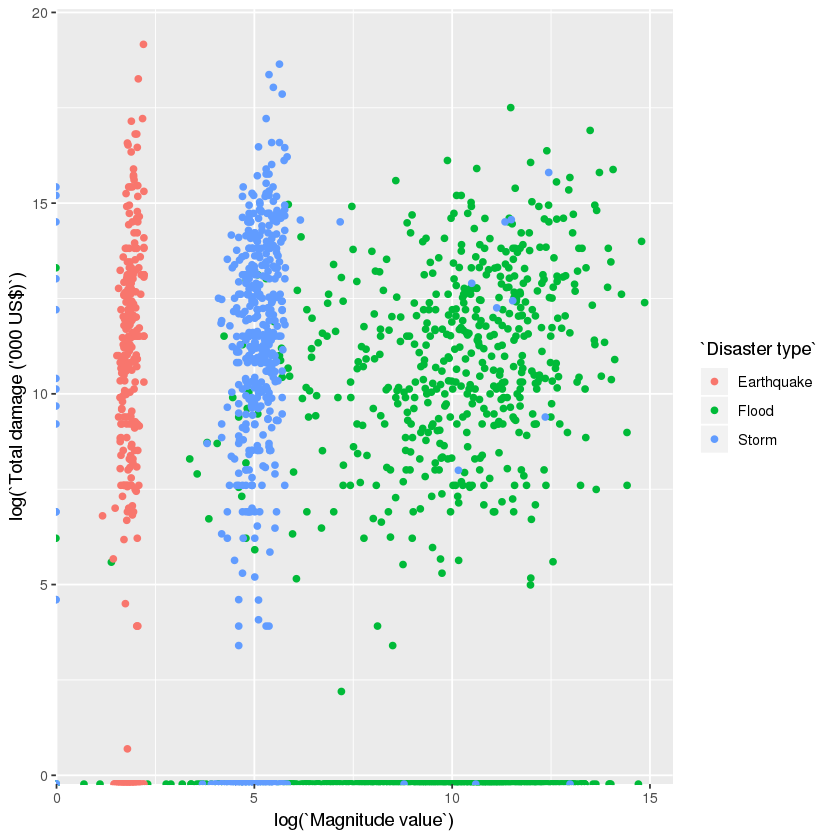

In [54]:
ggplot(combine_data_no_na, aes(log(`Magnitude value`), log(`Total damage (\'000 US$)`),
                                color = `Disaster type`)) + 
    geom_point()

In [45]:
options(dplyr.width = Inf)
combine_data_no_na %>% 
    filter(`Disaster No.` == '1999-0547') %>% 
    print(width = Inf)

  Start.Day Start.Month Start.Year End.Day End.Month End.Year
1        15          12       1999      20        12     1999
                             Country ISO
1 Venezuela (Bolivarian Republic of) VEN
                                                                                              Location
1 Federal district Caracas, Miranda, Vargas, Nueva Esparta, Yaracury, Falcon, Carabobo, Zulia, Tachira
  Latitude Longitude Magnitude value Magnitude scale Disaster type
1     <NA>      <NA>             350             Km2         Flood
  Disaster subtype Associated disaster Associated disaster2 Total deaths
1      Flash flood                  --                   --        30000
  Total affected Total damage ('000 US$) Insured losses ('000 US$)
1         483635                 3160000                     4e+05
  Disaster name Disaster No. iso2c       country DT.ODA.DACD.EMRC.CD
1                  1999-0547    VE Venezuela, RB                  NA
  DT.ODA.DACD.EMRC.DISA.CD DT.ODA.DA

In [55]:
names(combine_data_no_na)

[1] "Start.Day"                 "Start.Month"              
 [3] "Start.Year"                "End.Day"                  
 [5] "End.Month"                 "End.Year"                 
 [7] "Country"                   "ISO"                      
 [9] "Location"                  "Latitude"                 
[11] "Longitude"                 "Magnitude value"          
[13] "Magnitude scale"           "Disaster type"            
[15] "Disaster subtype"          "Associated disaster"      
[17] "Associated disaster2"      "Total deaths"             
[19] "Total affected"            "Total damage ('000 US$)"  
[21] "Insured losses ('000 US$)" "Disaster name"            
[23] "Disaster No."              "iso2c"                    
[25] "country"                   "DT.ODA.DACD.EMRC.CD"      
[27] "DT.ODA.DACD.EMRC.DISA.CD"  "DT.ODA.DACD.RFGE.CD"      
[29] "EN.CLC.DRSK.XQ"            "EN.CLC.MDAT.ZS"           
[31] "MO.INDEX.HDEV.XQ"          "NY.ADJ.NNTY.PC.CD"        
[33] "NY.GDP.MKTP.CD"            "SI.POV.GINI"              
[35] "SI.POV.NAPR.ZS"            "SI.POV.NGAP"              
[37] "SM.POP.REFG.OR"            "SP.POP.TOTL"              
[39] "UNDP.HDI.XD"               "VC.BTL.DETH"              
[41] "VC.IDP.TOCV"

In [56]:
test = head(combine_data_no_na)

In [65]:
disaster_modif %>% filter(Country == "Sri Lanka", 
                              Start.Year == "2011",
                             `Disaster type` == "Flood")

Start.Day,Start.Month,Start.Year,End.Day,End.Month,End.Year,Country,ISO,Location,Latitude,⋯,Disaster type,Disaster subtype,Associated disaster,Associated disaster2,Total deaths,Total affected,Total damage ('000 US$),Insured losses ('000 US$),Disaster name,Disaster No.
05,01,2011,18,01,2011,Sri Lanka,LKA,"Vavuniya district (Northern province), Central, Eastern, North Central, Sabaragamuwa, Uva provinces",7.60326,⋯,Flood,Riverine flood,"Slide (land, mud, snow, rock)",--,47,1060324,2e+05,0,,2011-0024
01,02,2011,10,02,2011,Sri Lanka,LKA,"Central, Northern, North Central, Eastern, Uva provinces",8.513,⋯,Flood,Riverine flood,--,--,18,225000,3e+05,0,,2011-0049
29,05,2011,29,05,2011,Sri Lanka,LKA,"Kegalle district (Sabaragamuwa province), Galle district (Southern province), Gampaha, Colombo, Kalutara districts (Western province)",NA,⋯,Flood,Riverine flood,--,--,0,8600,0e+00,0,,2011-0590


In [70]:
names(disaster_modif)

[1] "Start.Day"                 "Start.Month"              
 [3] "Start.Year"                "End.Day"                  
 [5] "End.Month"                 "End.Year"                 
 [7] "Country"                   "ISO"                      
 [9] "Location"                  "Latitude"                 
[11] "Longitude"                 "Magnitude value"          
[13] "Magnitude scale"           "Disaster type"            
[15] "Disaster subtype"          "Associated disaster"      
[17] "Associated disaster2"      "Total deaths"             
[19] "Total affected"            "Total damage ('000 US$)"  
[21] "Insured losses ('000 US$)" "Disaster name"            
[23] "Disaster No."

In [72]:
disaster_fts = disaster_modif %>% group_by(ISO, Start.Year,`Disaster type`) %>%
                summarise(case_num = n(), 
                tot_death = sum(`Total deaths`),
                tot_affected = sum(`Total affected`),
                tot_damage = sum(`Total damage (\'000 US$)`),
                tot_insured_loss = sum(`Insured losses (\'000 US$)`))

In [74]:
disaster_fts_wb = disaster_fts %>% left_join(wb_data_clean, by = 
                          c("ISO" = "iso3c", "Start.Year" = "date"))    

In [75]:
head(disaster_fts_wb)

ISO,Start.Year,Disaster type,case_num,tot_death,tot_affected,tot_damage,tot_insured_loss,iso2c,country,⋯,NY.ADJ.NNTY.PC.CD,NY.GDP.MKTP.CD,SI.POV.GINI,SI.POV.NAPR.ZS,SI.POV.NGAP,SM.POP.REFG.OR,SP.POP.TOTL,UNDP.HDI.XD,VC.BTL.DETH,VC.IDP.TOCV
AFG,1999,Earthquake,1,70,91960,0,0,AF,Afghanistan,⋯,NA,NA,NA,NA,NA,2601691,19403676,NA,4629,NA
AFG,1999,Flood,1,0,500,0,0,AF,Afghanistan,⋯,NA,NA,NA,NA,NA,2601691,19403676,NA,4629,NA
AFG,2001,Earthquake,2,4,270,0,0,AF,Afghanistan,⋯,106.8145,2461665938,NA,NA,NA,3809767,20966463,NA,5055,NA
AFG,2002,Earthquake,3,1200,100891,0,0,AF,Afghanistan,⋯,169.8866,4128820723,NA,NA,NA,2510294,21979923,NA,890,NA
AFG,2002,Flood,4,81,5545,0,0,AF,Afghanistan,⋯,169.8866,4128820723,NA,NA,NA,2510294,21979923,NA,890,NA
AFG,2003,Earthquake,1,1,1001,0,0,AF,Afghanistan,⋯,178.7278,4583644246,NA,NA,NA,2136043,23064851,NA,687,NA


In [172]:
disaster_fts_wb2 = disaster_fts_wb %>% 
    mutate(Project.ID = if_else(country == "Sri Lanka" & Start.Year == "2001" &
                                `Disaster type` == "Flood", "364", 
                        if_else(country == "Pakistan" & Start.Year == "2011" &
                                `Disaster type` == "Flood", "387",       
                        if_else(country == "Pakistan" & Start.Year == "2010" &
                                `Disaster type` == "Flood", "347",       
                        if_else(country == "Tajikistan" & Start.Year == "2009" &
                                `Disaster type` == "Flood", "312",       
                        if_else(country == "Nepal" & Start.Year == "2008" &
                                `Disaster type` == "Flood", "299",       
                        if_else(country == "Lao PDR" & Start.Year == "2008" &
                                `Disaster type` == "Flood", "301",       
                        if_else(country == "Yemen, Rep." & Start.Year == "2008" &
                                `Disaster type` == "Flood", "306",       
                        if_else(country == "Zambia" & Start.Year == "2007" &
                                `Disaster type` == "Flood", "245",       
                        if_else(country == "Madagascar" & Start.Year == "2007" &
                                `Disaster type` == "Flood", "244",       
                        if_else(country == "Mozambique" & Start.Year == "2007" &
                                `Disaster type` == "Flood", "243",       
                        if_else(country == "Pakistan" & Start.Year == "2007" &
                                `Disaster type` == "Flood", "248",       
                        if_else(country == "Korea, Dem. People’s Rep." & Start.Year == "2007" &
                                `Disaster type` == "Flood", "253",       
                        if_else(country == "Korea, Dem. People’s Rep." & Start.Year == "2007" &
                                `Disaster type` == "Flood", "252",       
                        if_else(country == "Burkina Faso" & Start.Year == "2007" &
                                `Disaster type` == "Flood", "258",       
                        if_else(country == "Ghana" & Start.Year == "2007" &
                                `Disaster type` == "Flood", "257",       
                        if_else(country == "Uganda" & Start.Year == "2007" &
                                `Disaster type` == "Flood", "255",       
                        if_else(country == "Ethiopia" & Start.Year == "2006" &
                                `Disaster type` == "Flood", "216,233,235",       
                        if_else(country == "Kenya" & Start.Year == "2007" &
                                `Disaster type` == "Flood", "234",       
                        if_else(country == "Haiti" & Start.Year == "2004" &
                                `Disaster type` == "Flood", "160",       
                        if_else(country == "Haiti" & Start.Year == "2017" &
                                `Disaster type` == "Storm", "586",       
                        if_else(country == "Fiji" & Start.Year == "2016" &
                                `Disaster type` == "Storm", "516",       
                        if_else(country == "Haiti" & Start.Year == "2017" &
                                `Disaster type` == "Storm", "630",       
                        if_else(country == "Haiti" & Start.Year == "2016" &
                                `Disaster type` == "Storm", "527",       
                        if_else(country == "Cuba" & Start.Year == "2008" &
                                `Disaster type` == "Storm", "305",       
                        if_else(country == "Ecuador" & Start.Year == "2016" &
                                `Disaster type` == "Earthquake", "522",       
                        if_else(country == "Nepal" & Start.Year == "2015" &
                                `Disaster type` == "Earthquake", "486",       
                        if_else(country == "Philippines" & Start.Year == "2013" &
                                `Disaster type` == "Earthquake", "440",       
                        if_else(country == "Solomon Islands" & Start.Year == "2007" &
                                `Disaster type` == "Earthquake", "247",       
                        if_else(country == "Peru" & Start.Year == "2007" &
                                `Disaster type` == "Earthquake", "251",       
                        if_else(country == "Tajikistan" & Start.Year == "2006" &
                                `Disaster type` == "Earthquake", "217",       
                        if_else(country == "Indonesia" & Start.Year == "2005" &
                                `Disaster type` == "Earthquake", "211",           
                        if_else(country == "Indonesia" & Start.Year == "2004" &
                                `Disaster type` == "Earthquake", "180",           
                        if_else(country == "India" & Start.Year == "2005" &
                                `Disaster type` == "Earthquake", "189", NULL          
))))))))))))))))))))))))))))))))))


In [186]:
disaster_fts_wb2$Project.ID = as.numeric(disaster_fts_wb2$Project.ID)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

In [196]:
disaster_fts_wb2 %>% filter(!is.na(Project.ID))

ISO,Start.Year,Disaster type,case_num,tot_death,tot_affected,tot_damage,tot_insured_loss,iso2c,country,⋯,NY.GDP.MKTP.CD,SI.POV.GINI,SI.POV.NAPR.ZS,SI.POV.NGAP,SM.POP.REFG.OR,SP.POP.TOTL,UNDP.HDI.XD,VC.BTL.DETH,VC.IDP.TOCV,Project.ID
BFA,2007,Flood,1,52,121043,0,0,BF,Burkina Faso,⋯,6771277871,NA,NA,NA,558,14252021,0.314,NA,NA,258
CUB,2008,Storm,4,7,499464,3572000,0,CU,Cuba,⋯,60806300000,NA,NA,NA,7938,11309754,NA,NA,NA,305
ECU,2016,Earthquake,2,673,389511,2000000,560000,EC,Ecuador,⋯,98613972000,45.0,NA,NA,1046,16385068,NA,NA,NA,522
FJI,2016,Storm,2,47,545558,600000,50000,FJ,Fiji,⋯,4671313315,NA,NA,NA,792,898760,NA,NA,NA,516
GHA,2007,Flood,1,56,332600,0,0,GH,Ghana,⋯,24758819718,NA,NA,NA,5063,22700212,0.506,NA,NA,257
HTI,2004,Flood,1,2665,31283,0,0,HT,Haiti,⋯,3537720277,NA,NA,NA,9208,9119178,NA,207,NA,160
HTI,2016,Storm,1,546,2100439,2000000,0,HT,Haiti,⋯,7970649131,NA,NA,NA,29684,10847334,NA,NA,NA,527
HTI,2017,Storm,3,4,40092,0,162,HT,Haiti,⋯,8408150518,NA,NA,NA,28414,10981229,NA,NA,NA,586
IDN,2004,Earthquake,6,165816,673731,4519600,225041,ID,Indonesia,⋯,256836875295,NA,NA,NA,27919,223614649,NA,915,NA,180
IDN,2005,Earthquake,2,916,105997,0,0,ID,Indonesia,⋯,285868618224,NA,NA,NA,34384,226712730,NA,213,NA,211


In [237]:
fts_data = fread("/winhome/awahyudi/hackathon/FTS - Requirements.csv")

Warning message in require_bit64():
“Some columns are type 'integer64' but package bit64 is not installed. Those columns will print as strange looking floating point data. There is no need to reload the data. Simply install.packages('bit64') to obtain the integer64 print method and print the data again.”

In [238]:
head(fts_data)

Event Code,Total,Met,Unmet,Other
364,46400000,26600000,19700000,4.644217e-317
387,356800000,157100000,199700000,5.167927e-316
347,1960000000,1380000000,583400000,6.324040e-315
312,1500000,648814,808080,1.062241e-316
299,16500000,10200000,6300000,1.037538e-317
301,9900000,4500000,5400000,3.010041e-318


In [239]:
names(fts_data)
str(fts_data)

[1] "Event Code" "Total"      "Met"        "Unmet"      "Other"

Classes ‘data.table’ and 'data.frame':	39 obs. of  5 variables:
 $ Event Code: int  364 387 347 312 299 301 306 245 244 243 ...
 $ Total     : int  46400000 356800000 1960000000 1500000 16500000 9900000 11500000 8900000 19500000 38700000 ...
 $ Met       : int  26600000 157100000 1380000000 648814 10200000 4500000 5100000 1100000 17100000 26600000 ...
 $ Unmet     : int  19700000 199700000 583400000 808080 6300000 5400000 6400000 7800000 2400000 12100000 ...
 $ Other     : 'integer64' num  4.64e-317 5.17e-316 6.32e-315 1.06e-316 1.04e-317 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [240]:
disaster_wb_fts_final = disaster_fts_wb2 %>% left_join(fts_data, by = c('Project.ID' = 'Event Code'))

In [263]:
fwrite(disaster_wb_fts_final, "/winhome/awahyudi/hackathon/disaster_wb_fts_final.csv")

In [264]:
disaster_finance = disaster_wb_fts_final %>% filter(!is.na(Total))

In [266]:
disaster_finance = disaster_finance[-c(17,21),]

In [267]:
df_dummy = disaster_finance %>%  
    mutate(dist.type = 1) %>%  
    spread(`Disaster type`, dist.type, fill = 0)

In [269]:
head(df_dummy)

ISO,Start.Year,case_num,tot_death,tot_affected,tot_damage,tot_insured_loss,iso2c,country,DT.ODA.DACD.EMRC.CD,⋯,VC.BTL.DETH,VC.IDP.TOCV,Project.ID,Total,Met,Unmet,Other,Earthquake,Flood,Storm
BFA,2007,1,52,121043,0,0,BF,Burkina Faso,10971895,⋯,NA,NA,258,6000000,1300000,4700000,2.203533e-316,0,1,0
CUB,2008,4,7,499464,3572000,0,CU,Cuba,NA,⋯,NA,NA,305,30000000,9200000,20900000,5.138283e-317,0,0,1
ECU,2016,2,673,389511,2000000,560000,EC,Ecuador,NA,⋯,NA,NA,522,72800000,27600000,45300000,8.744962e-317,1,0,0
FJI,2016,2,47,545558,600000,50000,FJ,Fiji,NA,⋯,NA,NA,516,38600000,21800000,16800000,1.002953e-316,0,0,1
GHA,2007,1,56,332600,0,0,GH,Ghana,10435421,⋯,NA,NA,257,12400000,8200000,4200000,1.862627e-316,0,1,0
HTI,2004,1,2665,31283,0,0,HT,Haiti,NA,⋯,207,NA,160,37400000,17500000,19800000,1.279630e-316,0,1,0


In [270]:
str(df_dummy)

Classes ‘grouped_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	30 obs. of  33 variables:
 $ ISO                     : chr  "BFA" "CUB" "ECU" "FJI" ...
 $ Start.Year              : chr  "2007" "2008" "2016" "2016" ...
 $ case_num                : int  1 4 2 2 1 1 1 3 6 2 ...
 $ tot_death               : int  52 7 673 47 56 2665 546 4 165816 916 ...
 $ tot_affected            : int  121043 499464 389511 545558 332600 31283 2100439 40092 673731 105997 ...
 $ tot_damage              : num  0 3572000 2000000 600000 0 ...
 $ tot_insured_loss        : num  0 0 560000 50000 0 ...
 $ iso2c                   : chr  "BF" "CU" "EC" "FJ" ...
 $ country                 : chr  "Burkina Faso" "Cuba" "Ecuador" "Fiji" ...
 $ DT.ODA.DACD.EMRC.CD     : num  10971895 NA NA NA 10435421 ...
 $ DT.ODA.DACD.EMRC.DISA.CD: num  263466 NA NA NA 258385 ...
 $ DT.ODA.DACD.RFGE.CD     : num  NA NA NA NA 125738 ...
 $ EN.CLC.DRSK.XQ          : num  NA NA NA NA NA NA NA NA NA NA ...
 $ EN.CLC.MDAT.ZS          : num  NA NA NA

Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”

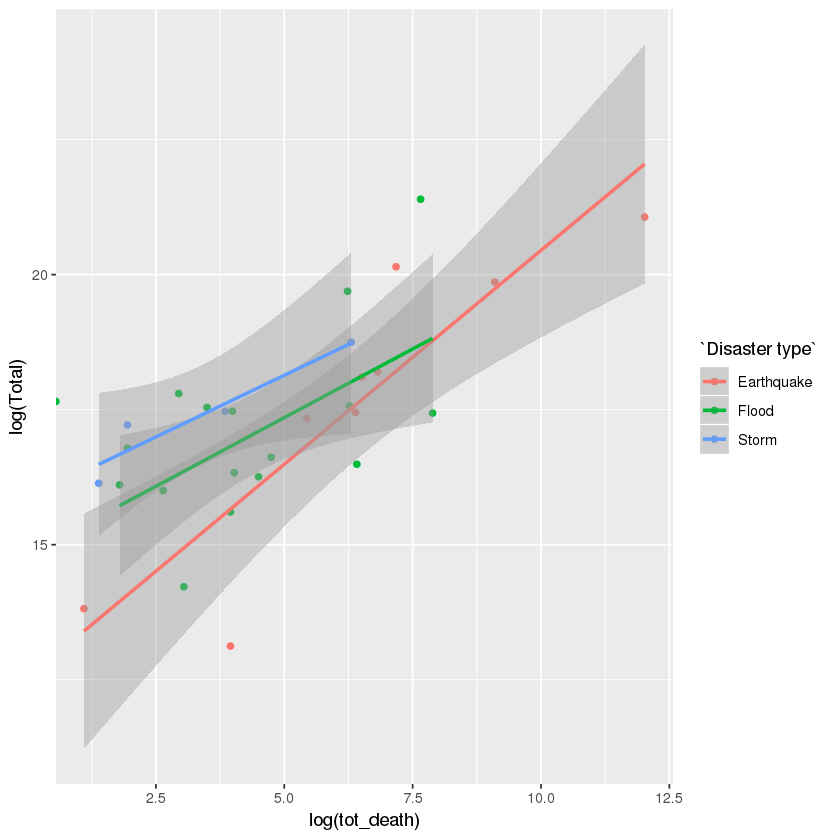

In [298]:
ggplot(disaster_finance, aes(log(tot_death), log(Total), color = `Disaster type`)) + geom_point() + geom_smooth(method='lm')

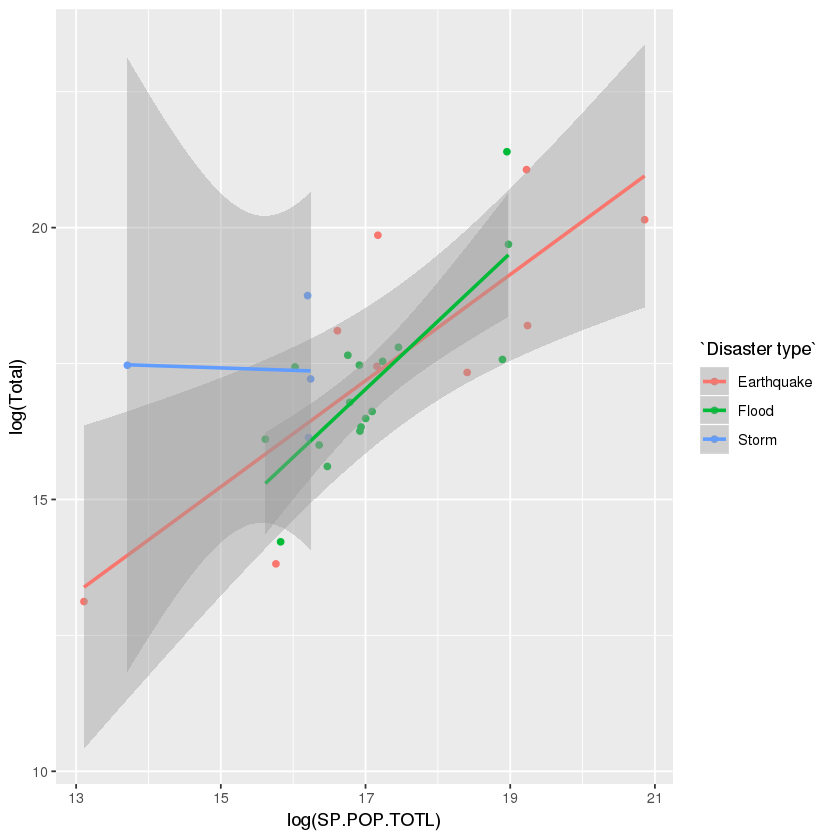

In [314]:
ggplot(disaster_finance, aes(log(SP.POP.TOTL), log(Total), color = `Disaster type`)) + geom_point() + geom_smooth(method='lm')

In [275]:
names(df_dummy)

[1] "ISO"                      "Start.Year"              
 [3] "case_num"                 "tot_death"               
 [5] "tot_affected"             "tot_damage"              
 [7] "tot_insured_loss"         "iso2c"                   
 [9] "country"                  "DT.ODA.DACD.EMRC.CD"     
[11] "DT.ODA.DACD.EMRC.DISA.CD" "DT.ODA.DACD.RFGE.CD"     
[13] "EN.CLC.DRSK.XQ"           "EN.CLC.MDAT.ZS"          
[15] "MO.INDEX.HDEV.XQ"         "NY.ADJ.NNTY.PC.CD"       
[17] "NY.GDP.MKTP.CD"           "SI.POV.GINI"             
[19] "SI.POV.NAPR.ZS"           "SI.POV.NGAP"             
[21] "SM.POP.REFG.OR"           "SP.POP.TOTL"             
[23] "UNDP.HDI.XD"              "VC.BTL.DETH"             
[25] "VC.IDP.TOCV"              "Project.ID"              
[27] "Total"                    "Met"                     
[29] "Unmet"                    "Other"                   
[31] "Earthquake"               "Flood"                   
[33] "Storm"

In [293]:
df_dummy_train = df_dummy[c('case_num', 'tot_death', 'tot_affected',
    'tot_damage', 'tot_insured_loss', 'DT.ODA.DACD.EMRC.CD',
    'DT.ODA.DACD.EMRC.DISA.CD', 'DT.ODA.DACD.RFGE.CD', 
    'EN.CLC.DRSK.XQ', 'EN.CLC.MDAT.ZS', 'MO.INDEX.HDEV.XQ', 
    'NY.ADJ.NNTY.PC.CD', 'NY.GDP.MKTP.CD', 'SI.POV.GINI', 
    'SI.POV.NAPR.ZS', 'SI.POV.NGAP', 'SM.POP.REFG.OR', 'SP.POP.TOTL',
    'UNDP.HDI.XD', 'VC.BTL.DETH', 'VC.IDP.TOCV', 'Total', 
    'Earthquake', 'Flood', 'Storm')]

In [294]:
df_dummy_train[is.na(df_dummy_train)] <- 0

In [295]:
head(df_dummy_train)

case_num,tot_death,tot_affected,tot_damage,tot_insured_loss,DT.ODA.DACD.EMRC.CD,DT.ODA.DACD.EMRC.DISA.CD,DT.ODA.DACD.RFGE.CD,EN.CLC.DRSK.XQ,EN.CLC.MDAT.ZS,⋯,SI.POV.NGAP,SM.POP.REFG.OR,SP.POP.TOTL,UNDP.HDI.XD,VC.BTL.DETH,VC.IDP.TOCV,Total,Earthquake,Flood,Storm
1,52,121043,0,0,10971895,263466,0,0,0,⋯,0,558,14252021,0.314,0,0,6000000,0,1,0
4,7,499464,3572000,0,0,0,0,0,0,⋯,0,7938,11309754,0.000,0,0,30000000,0,0,1
2,673,389511,2000000,560000,0,0,0,0,0,⋯,0,1046,16385068,0.000,0,0,72800000,1,0,0
2,47,545558,600000,50000,0,0,0,0,0,⋯,0,792,898760,0.000,0,0,38600000,0,0,1
1,56,332600,0,0,10435421,258385,125738,0,0,⋯,0,5063,22700212,0.506,0,0,12400000,0,1,0
1,2665,31283,0,0,0,0,0,0,0,⋯,0,9208,9119178,0.000,207,0,37400000,0,1,0


In [312]:
lm.fit = lm(Total ~ ., data = df_dummy_train)

In [313]:
summary(lm.fit)


Call:
lm(formula = Total ~ ., data = df_dummy_train)

Residuals:
      Min        1Q    Median        3Q       Max 
-31429777  -6961426   -381004   2900409  42602487 

Coefficients: (3 not defined because of singularities)
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -2.821e+07  4.613e+07  -0.612  0.55777    
case_num                  3.260e+05  7.639e+06   0.043  0.96701    
tot_death                 8.107e+03  7.203e+02  11.256 3.49e-06 ***
tot_affected              9.507e+00  1.311e+01   0.725  0.48890    
tot_damage                2.592e+01  1.228e+01   2.110  0.06785 .  
tot_insured_loss          4.917e+01  1.322e+02   0.372  0.71956    
DT.ODA.DACD.EMRC.CD      -1.045e-01  2.140e-01  -0.488  0.63835    
DT.ODA.DACD.EMRC.DISA.CD  4.308e+01  7.478e+01   0.576  0.58040    
DT.ODA.DACD.RFGE.CD      -7.739e+01  3.175e+02  -0.244  0.81355    
EN.CLC.DRSK.XQ           -4.420e+08  1.222e+08  -3.617  0.00681 ** 
EN.CLC.MDAT.ZS           -5.